In [77]:
import cv2
import numpy as np
import time
import math
import heapq
import matplotlib.pyplot as plt
plt.ion()

height = 200
width = 300

# rad = input("Enter the radius of the robot: ")
# rad = int(rad)
# clearance = input("Enter the clearance for the robot: ")
# clearance = int(clearance)

# blank_image = np.zeros((height, width, 3), np.uint8)


def check(x, y, r, c, c1):
    # Rhombus
    if ((x * (-3 / 5) + y - 55 - r - c < 0) and (x * (3 / 5) + y - 325 - r - c < 0) and (
            x * (-3 / 5) + y - 25 + r + c > 0) and (x * (3 / 5) + y - 295 + r + c > 0)):
        return True

    # polygon - rhombus
    elif x * (7 / 5) + y - 120 > 0 and x * (-6 / 5) + y + 10 - c - r < 0 and x * (6 / 5) + y - 170 - c - r < 0 and x * (
            -7 / 5) + y + 90 + c + r > 0:
        return True

    # polygon - triangle1
    elif y - 15 + c + r > 0 and x * (7 / 5) + y - 120 < 0 and x * (-7 / 5) + y + 20 < 0:
        return True

    # polygon - triangle2
    elif y + 13 * x - 340 + c + r + c1 > 0 and x + y - 100 - r - c < 0 and x * (-7 / 5) + y + 20 > 0:
        return True

    # rectangle -angled
    elif (200 - y) - (1.73) * x + 135 + r + c > 0 and (200 - y) + (0.58) * x - 96.35 - r - c <= 0 and (200 - y) - (
    1.73) * x - 15.54 - r - c <= 0 and (200 - y) + (0.58) * x - 84.81 + r + c >= 0:
        return True

    else:
        return False


def obstaclecheck_circle(x, y, r, c):
    if (((x - 225) ** 2) + ((y - 50) ** 2) < ((25 + r + c) ** 2)):
        return True
    else:
        return False


def obstaclecheck_ellipse(x, y, r, c):
    if (((x - 150) ** 2 / (40 + c + r) ** 2) + ((y - 100) ** 2) / (20 + c + r) ** 2) <= 1:
        return True
    else:
        return False


def obstacle_check(new_i, new_j, r, c):
    c1 = 40
    if obstaclecheck_circle(new_i, new_j, r, c):
        return True
    elif obstaclecheck_ellipse(new_i, new_j, r, c):
        return True
    elif check(new_i, new_j, r, c, c1):
        return True
    elif ((new_i - r - c < 0) or (200-new_j - r - c < 0) or (new_i + r + c > width - 1) or (200-new_j + r + c > height - 1)):
        return True
    else:
        return False

def obstacle_map(rad,clearance): 
    plot_x =[]
    plot_y =[]
    rigid_x=[]
    rigid_y=[]
    for x in range(300):
        for y in range(200):
            if obstacle_check(x, 200-y, rad, clearance):
                rigid_x.append(x)
                rigid_y.append(y)
#                 blank_image[x, y] = (150, 150, 150)
            if obstacle_check(x, 200-y, 0, 0):
                plot_x.append(x)
                plot_y.append(y)
                
    plt.plot(rigid_x,rigid_y,".y")
    plt.xlim(0,300)
    plt.ylim(0,200)
    plt.plot(plot_x,plot_y,".k")
    plt.show()
    plt.pause(5)
    plt.close()
    
#                 blank_image[x, y] = (255, 255, 255)          
#     cv2.imshow("blank_image",blank_image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

# print("Enter 1 to select the Goal and Start point by clicking on the image")
# print("Enter 2 to manually enter the Goal and Start Node")
# i = input("Enter your choice: ")
# i = int(i)

# if (i == 1):
#     m = 0
#     a = []


#     def draw_circle(event, x, y, flags, param):
#         global m
#         global mouseX, mouseY
#         if event == cv2.EVENT_FLAG_LBUTTON:
#             cv2.circle(blank_image, (x, y), 5, (255, 0, 0), -1)
#             a.append(x)
#             a.append(y)
#             mouseX, mouseY = x, y
#             if len(a) > 2:
#                 cv2.circle(blank_image, (a[2], a[3]), 5, (255, 0, 0), -1)
#             print("coordinates of the start and goal node = ")
#             print(mouseX, 200 - mouseY)
#             m = m + 1


#     cv2.namedWindow('image')
#     cv2.setMouseCallback('image', draw_circle)

#     while (1):
#         cv2.imshow('image', blank_image)
#         k = cv2.waitKey(20) & 0xFF
#         if k == 27 or m == 2:
#             cv2.waitKey(1000)
#             cv2.destroyAllWindows()
#             break
#     cv2.circle(blank_image, (a[2], a[3]), 2, (255, 0, 0), -1)
#     w = a[0]
#     x = a[1]
#     y = a[2]
#     z = a[3]
#     c2 = 40
#     if obstacle_check(w, x, rad, clearance, c2):
#         print(" Start point - Obstacles detected or the points are out of the maze")
#         exit()
#     elif obstacle_check(y, z, rad, clearance, c2):
#         print(" Goal point - Obstacles detected or the points are out of the maze")
#         exit()
#     else:
#         print("\n")
#         print("***********Wait till the path gets generated - max wait time -180 seconds**********")
#         for i in range(width):
#             for j in range(height):
#                 inner_dict = {}
#                 function(i, j, rad, clearance, c2)
#         start_time = time.time()
#         short_path = dijkstra(maze, (w, x), (y, z))

# if (i == 2):
#     w = input("Enter x coordinates for the Start point : ")
#     x = input("Enter y coordinates for the Start point : ")
#     y = input("Enter x coordinates for the Goal point : ")
#     z = input("Enter x coordinates for the Goal point : ")

#     w = int(w)
#     x = int(x)
#     x = 200 - x
#     y = int(y)
#     z = int(z)
#     z = 200 - z

#     c2 = 40
#     if obstacle_check(w, x, rad, clearance, c2):
#         print(" Start point - Obstacles detected or the points are out of the maze")
#         exit()
#     elif (y, z, rad, clearance, c2):
#         print(" Goal point - Obstacles detected or the points are out of the maze")obstacle_check
#         exit()
#     else:
#         print("\n")
#         print("***********Wait till the path gets generated - max wait time -120 seconds**********")
#         for i in range(width):
#             for j in range(height):
#                 inner_dict = {}
#                 function(i, j, rad, clearance, c2)
#         start_time = time.time()
#         short_path = dijkstra(maze, (w, x), (y, z))
#         print("--- %s seconds ---" % (time.time() - start_time))


In [78]:
# def coordinates(step_size, theta):
#     theta = math.radians(theta)
#     X = step_size*math.cos(theta)
#     Y = step_size*math.sin(theta)
#     return X, Y
    

In [125]:
def action_model(step_size, theta, theta_start):   
#     X, Y = coordinates(step_size, theta)
#     actions = [[Y, X ,1], [X, Y, 1], [step_size, 0, 1], [X, -Y, 1], [Y, -X,1]] 
    theta = math.radians(theta)
    theta_start = math.radians(theta_start)
#     actions = [[step_size*math.cos(theta_start), step_size*math.sin(theta_start),1], 
#                [step_size*math.cos(theta + theta_start), step_size*math.sin(theta + theta_start),1],
#                [step_size*math.cos(2*theta + theta_start), step_size*math.sin(2*theta + theta_start),1],
#                [step_size*math.cos(-theta + theta_start), step_size*math.sin(-theta + theta_start),1],
#                [step_size*math.cos(-2*theta + theta_start), step_size*math.sin(-2*theta + theta_start),1]]
    actions = [[step_size*math.cos(2*theta + theta_start), step_size*math.sin(2*theta + theta_start),1],
               [step_size*math.cos(theta + theta_start), step_size*math.sin(theta + theta_start),1],
               [step_size*math.cos(theta_start), step_size*math.sin(theta_start),1], 
               [step_size*math.cos(-theta + theta_start), step_size*math.sin(-theta + theta_start),1],
               [step_size*math.cos(-2*theta + theta_start), step_size*math.sin(-2*theta + theta_start),1]]
    return actions

def main():
    x_start = 0
    y_start = 0
    theta_start = 0
    theta = 30
    
    x_goal = 3
    y_goal = 1
    theta_goal = 0
    
    
    start_node = (x_start, y_start, theta_start)
    goal_node = (x_goal, y_goal, theta_goal)
    robot_radius = 0
    clearance = 0
    step_size = 1
    
    obstacle_map(robot_radius, clearance)     
    a_star(start_node,goal_node, step_size, theta, robot_radius, clearance)

In [119]:
def cost2go(pt1, pt2):
    dist = math.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)
    return dist
    

In [120]:
def threshold(x,y,th,thresh,theta):
    x = (round(x * 2) / 2)/thresh
    y = (round(y * 2) / 2)/thresh
    th = (round(th/theta)*theta)/theta

#     return x,y, theta         
    
    return (x*thresh,y*thresh,th*theta)

In [121]:
print(threshold(3,1,0,1.5,30))

(3.0, 1.0, 0.0)


In [122]:
def a_star(start_node,goal_node, step_size, theta, rad, clearance):
#     print("a_star")
    goal_node = threshold(goal_node[0], goal_node[1], goal_node[2], 1.5, theta)
#     print(goal_node)
    visited_nodes = np.zeros((600,400,12))
    start = (0,start_node,None)       # cost, node, parent node
    goal = (0,goal_node,None)
    actions = action_model(step_size, theta, start_node[2])
#     print(actions)

    
    nodes = []
    path_nodes = []
    heapq.heappush(nodes,(start))
#     print(nodes)

    x_explored=[]
    y_explored=[]

    while len(nodes)>0:
#         print("in while")
#         print(nodes)
        current_node = heapq.heappop(nodes)
        heapq.heappush(path_nodes,current_node)
        x_explored.append(current_node[1][0])
        y_explored.append(current_node[1][1])
        # print("current node")
        # print(current_node)
        # print(path_nodes)

        #x_explored.append(current_node[1][0])
        #y_explored.append(current_node[1][1])
        i = theta*2
        angle = 0
        for new_pos in actions:
            print(i)
            angle = theta_start + i
            
            node = (current_node[1][0] + new_pos[0],
                             current_node[1][1] + new_pos[1], angle)
            node = threshold(node[0],node[1],node[2],0.5,theta)
            node_cost = current_node[0] + new_pos[2] + cost2go(node, goal[1])
            
            
            node_parent = current_node[1]
        
            if obstacle_check(round(node[0]),200-round(node[1]),rad, clearance) == False:
#                 print("node x:",round(node[0])
#                 print("node y:",node[1])
                new_node = (node_cost,node,node_parent)                
                heapq.heappush(nodes,(new_node))
            i = i-theta

        if current_node[1] == goal[1]:
            print('Goal reached')
            path = []
            #print(path_nodes)
            length = len(path_nodes)
            path.append(path_nodes[length-1][1])
            #print(path)
            parent = path_nodes[length-1][2]
            #print(parent)
            while parent != None: 
                for i in range(length):
                    X = path_nodes[i]
                    #print("xxxxxxxxxxxxxxxxxxxxxxx")
                    #print(X[1])
                    if X[1] == parent:
                        parent = X[2]
                        #print("yyyyyyyyyyyy")
                        #print(parent)
                        path.append(X[1])
            print("pathhhhhhhhhhhh")
            print(path)
            return path,x_explored,y_explored

        #if (len(x_explored))%500 == 0:
        #        #print("YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY")
        #        plt.plot(x_explored,y_explored, "3c")
        #        plt.pause(0.00001)

In [123]:
theta_start = 0

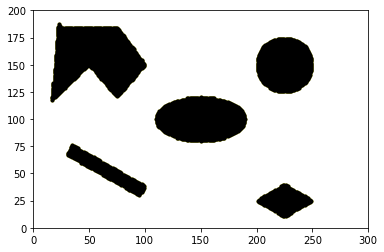

60
30
0
-30
-60
60
30
0
-30
-60
60
30
0
-30
-60
60
30
0
-30
-60
60
30
0
-30
-60
60
30
0
-30
-60
60
30
0
-30
-60
60
30
0
-30
-60
60
30
0
-30
-60
60
30
0
-30
-60
60
30
0
-30
-60
60
30
0
-30
-60
60
30
0
-30
-60
60
30
0
-30
-60
60
30
0
-30
-60
60
30
0
-30
-60
Goal reached
pathhhhhhhhhhhh
[(3.0, 1.0, 0.0), (2.0, 1.0, 30.0), (1.0, 0.5, 30.0), (0, 0, 0)]


In [126]:
main()

In [97]:
obstacle_check(50,135,2, 2)

True

In [107]:
print(goal_node)

NameError: name 'goal_node' is not defined